<a href="https://colab.research.google.com/github/MohamedAmine095/Amine-GomyCode1/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
df=pd.read_csv('movies11.csv',encoding='ISO-8859-1')
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


Let's check if there are any missing values

In [64]:
df.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

In [65]:
df.rename({'gross':'revenue'},axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   revenue   6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


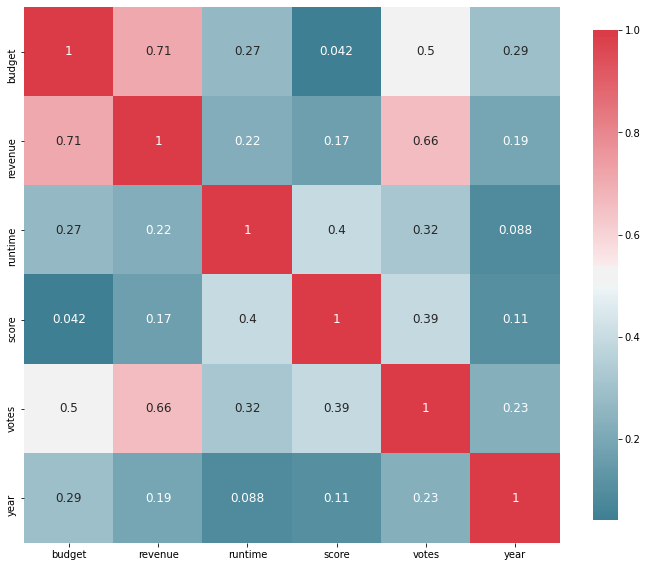

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)

> Our target is the movies' revenues data.Thanks to this correlogram we can conclude that the budget and votes would
be our initial features to express the predictive model.
In fact we all know the importance financial ressources for any project and thus in cinema.

> Any artistic work depends always on comments and critics which makes votes very important to explain the success of the movie.

> As we can see,the score has not a good correlation with the revenue which logically cannot be easily accepted because of the impact that have any rating on cinephiles and thus the movie's revenue.Yet, the score at itself can't give us an idea about the movie's quality and the way people perceive it, because this feature depends on two important data which are: the number of votes for each movie and the rate that got the film.For example, in this same "score logic", a movie  with a rate of 8 but with only 10 voters will always be considered better than another movie rated 7 but with 1000 people voting for it.So,we decided to change the rating method and adopt the a weighted rating take into consideration both number of voters and ratings in order to have more homogenous data.

> This is the chosen formula:
WeightedRating(WR)= R*V/M      
> with :
1.   R: The actual score of the movie
2.   V:The number of votes for the movie
3.   M:The total number of votes

In [67]:
m=df['votes'].sum()
def WR(x,m=m):
  s=x['score']
  v=x['votes']
  return s*v/m
df['weighted rate']=df.apply(WR,axis=1)

In [68]:
df.head()

,budget,company,country,director,genre,revenue,name,rating,released,runtime,score,star,votes,writer,year,weighted rate
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,0.004989
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,0.004251
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,0.003365
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,0.009341
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,0.000520


In [69]:
df['votes'].describe()

count    6.820000e+03
mean     7.121952e+04
std      1.305176e+05
min      2.700000e+01
25%      7.665250e+03
50%      2.589250e+04
75%      7.581225e+04
max      1.861666e+06
Name: votes, dtype: float64

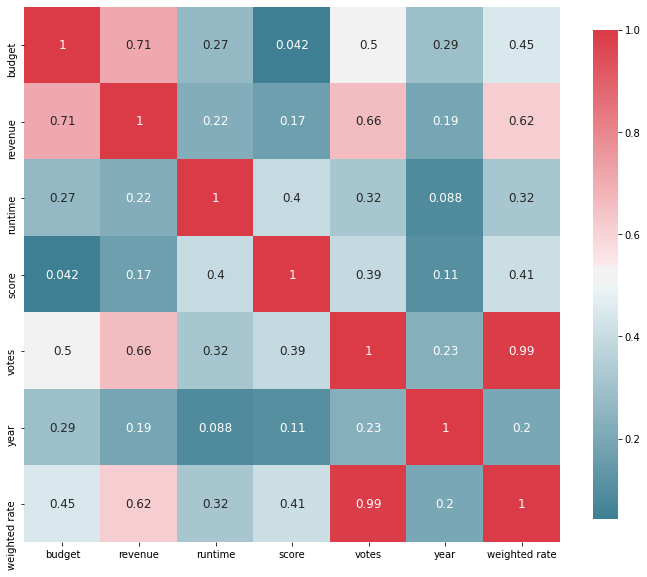

In [70]:
plot_correlation_map(df)

> The weighted rate's correlation with our initial target (the revenue) is way too better than the score's one.It is obvious that the new feature is more significant since we are dealing with movies having different number of votes and dissimilar ratings.

> As we've seen previously,we do not have NaN values, but we can have some zero "non-missing" numerical values in some columns whcich may lead us to the same NaN problem ,so let's re-check the whole values in our dataset.

In [71]:
for i in df.columns:
    x = df[i].value_counts()
    print("Column name is:",i.upper())
    print(x)
    print()

Column name is: BUDGET
0.0            2182
20000000.0      207
30000000.0      191
25000000.0      177
15000000.0      170
               ... 
29000001.0        1
128000000.0       1
24500000.0        1
300000.0          1
5800000.0         1
Name: budget, Length: 351, dtype: int64

Column name is: COMPANY
Universal Pictures                        302
Warner Bros.                              294
Paramount Pictures                        259
Twentieth Century Fox Film Corporation    205
New Line Cinema                           172
                                         ... 
Bombshell Pictures                          1
Esperanza Films Inc.                        1
Imprint Entertainment                       1
Cinefarm                                    1
Cinema 7                                    1
Name: company, Length: 2179, dtype: int64

Column name is: COUNTRY
USA                               4872
UK                                 698
France                             283
Ca

The budget contains too many null cells so we decided to replace them by the mean of the entire column

In [72]:
df['budget'].describe()

count    6.820000e+03
mean     2.458113e+07
std      3.702254e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+07
75%      3.200000e+07
max      3.000000e+08
Name: budget, dtype: float64

In [73]:
df.loc[df['budget'] ==0, 'budget'] = df['budget'].mean()
df['budget'].describe()

count    6.820000e+03
mean     3.244565e+07
std      3.339852e+07
min      6.000000e+03
25%      1.500000e+07
50%      2.458113e+07
75%      3.200000e+07
max      3.000000e+08
Name: budget, dtype: float64

Let's study the relationships between different features in our dataset.

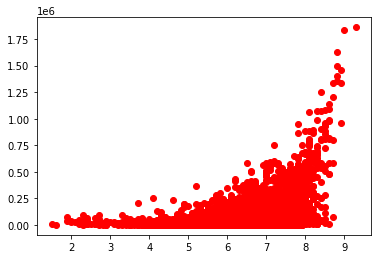

In [112]:
plt.plot(df['score'],df['votes'],'ro')
plt.show()

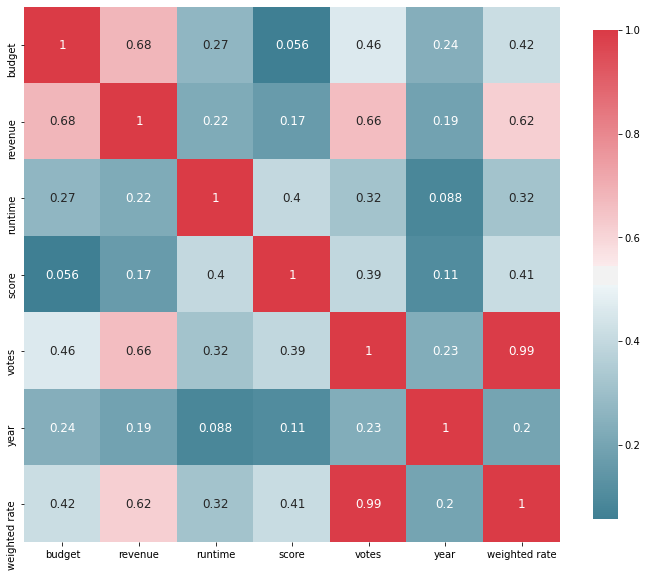

In [75]:
plot_correlation_map(df)

The revenue-budget correlation has a bit lowered since our last data modification (replacing null values by mean)

In [76]:
df['star'].value_counts()

Nicolas Cage         42
Robert De Niro       38
Denzel Washington    36
Tom Hanks            35
Bruce Willis         33
                     ..
Andrew Lawrence       1
Stephen Baldwin       1
Günes Sensoy          1
Olivier Martinez      1
Guillaume Canet       1
Name: star, Length: 2504, dtype: int64

In [115]:
Actors=df['star'].value_counts()
l=dict(Actors)
l1=[]
l2=[]
for k, v in l.items():
  if l[k]>=25:
    l1.append(k) 
    l2.append(v)
print(l1)
print(l2)


['Nicolas Cage', 'Robert De Niro', 'Denzel Washington', 'Tom Hanks', 'Bruce Willis', 'Johnny Depp', 'Ben Stiller', 'Adam Sandler', 'Tom Cruise', 'Kevin Costner', 'John Cusack', 'Robin Williams', 'Eddie Murphy', 'Sylvester Stallone', 'John Travolta']
[42, 38, 36, 35, 33, 32, 27, 27, 27, 26, 26, 25, 25, 25, 25]


These are the lists of the top 10 actors in the last 30 years

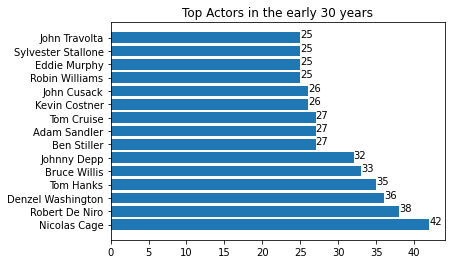

In [78]:
import numpy as np

height = l2
bars = tuple(l1)
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
plt.title('Top Actors in the early 30 years') 
for index, value in enumerate(height):
    plt.text(value, index, str(value))
# Show graphic
plt.show()


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   budget         6820 non-null   float64
 1   company        6820 non-null   object 
 2   country        6820 non-null   object 
 3   director       6820 non-null   object 
 4   genre          6820 non-null   object 
 5   revenue        6820 non-null   float64
 6   name           6820 non-null   object 
 7   rating         6820 non-null   object 
 8   released       6820 non-null   object 
 9   runtime        6820 non-null   int64  
 10  score          6820 non-null   float64
 11  star           6820 non-null   object 
 12  votes          6820 non-null   int64  
 13  writer         6820 non-null   object 
 14  year           6820 non-null   int64  
 15  weighted rate  6820 non-null   float64
dtypes: float64(4), int64(3), object(9)
memory usage: 852.6+ KB


In [80]:
df['company'].value_counts()

Universal Pictures                        302
Warner Bros.                              294
Paramount Pictures                        259
Twentieth Century Fox Film Corporation    205
New Line Cinema                           172
                                         ... 
Bombshell Pictures                          1
Esperanza Films Inc.                        1
Imprint Entertainment                       1
Cinefarm                                    1
Cinema 7                                    1
Name: company, Length: 2179, dtype: int64

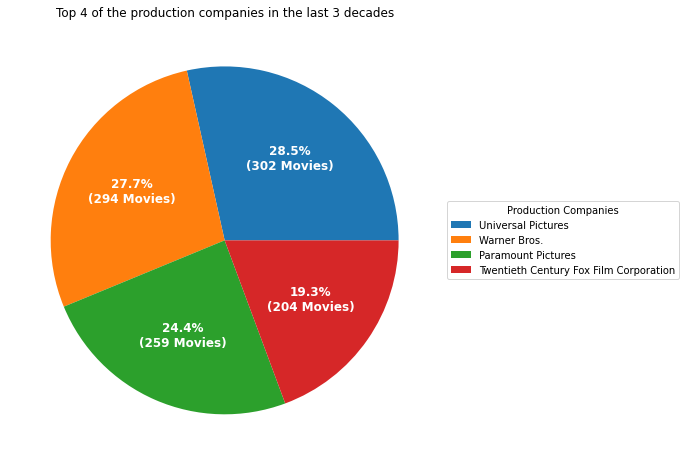

In [116]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} Movies)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(l5, autopct=lambda pct: func(pct, l5),
                                textprops=dict(color="w"))
ax.legend(wedges, l4,
          title="Production Companies",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

ax.set_title("Top 4 of the production companies in the last 3 decades")

plt.show()